In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load your dataset
# Make sure to replace 'path_to_dataset.csv' with the path to your actual data file
df = pd.read_csv('/Users/thomas/Desktop/995,000_rows.csv')

category_mapping = {
    "fake": "Fake News",
    "satire": "Fake News",
    "bias": "Fake News",
    "conspiracy": "Fake News",
    "junksci": "Fake News",
    "hate": "Fake News",
    "clickbait": "Fake News",
    "unreliable": "Fake News",
    "political": "Reliable News",
    "reliable": "Reliable News" ,
    "Reliable News": "Reliable News",
    "rumor": "Fake News"

}
# Splitting the data so you only run on 10% of the dataset (temp)
train, temp = train_test_split(df, test_size=0.1, random_state=42)

# Apply the mapping
temp['broad_category'] = temp['type'].map(category_mapping)


/var/folders/ql/3l_9_vz123j8hhscd3j0_52c0000gp/T/ipykernel_18358/1024966496.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/thomas/Desktop/995,000_rows.csv')


## GRAF WITH LENGTH CORRELATION 

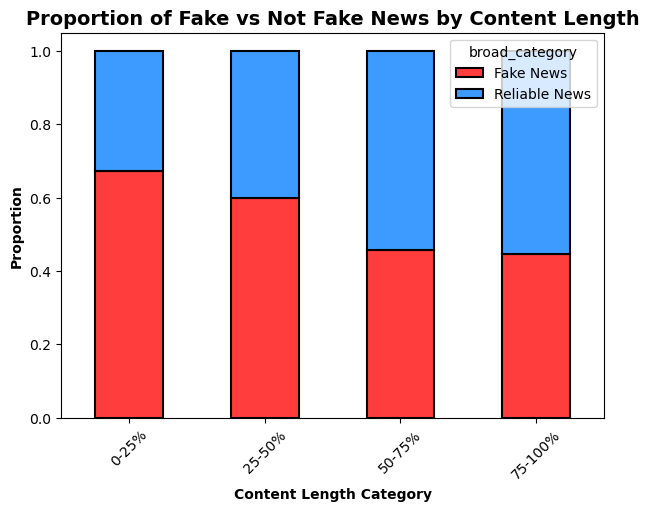

In [23]:



import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'content' column is of type string and then calculate length
temp['content'] = temp['content'].astype(str)
temp['content_length'] = temp['content'].apply(len)


# Apply the function to the 'content' column to create a new 'length_category' column
temp['length_category'] = pd.qcut(temp['content_length'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])


# Use crosstab to analyze the distribution of fake vs not fake across different text lengths
category_correlation = pd.crosstab(index=temp['length_category'], columns=temp['broad_category'], normalize='index')

# Calculate correlation - Chi-square test to assess independence
contingency_table = pd.crosstab(index=temp['length_category'], columns=temp['broad_category'])




# Plotting the proportions
colors = ['#ff3d3d', '#3d9bff'] 

ax = category_correlation.plot(kind='bar', stacked=True, color=colors,
                               linewidth=1.5, edgecolor='black')
plt.title('Proportion of Fake vs Not Fake News by Content Length', fontsize=14,fontweight='bold')
plt.xlabel('Content Length Category',fontweight='bold')
plt.ylabel('Proportion',fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gcf().set_size_inches(7, 5)
plt.show()

### Chart description
This chart illustrates the correlation between the length of articles and their classification under the broad category label. The data has been meticulously organized by article length and segmented into four equal quartiles, as indicated by the respective percentage labels. This visualization represents 10% of the larger article corpus.


## GRAF WITH THE 10.000 MOST OCCURING WORDS 


In [3]:
from collections import Counter

#Gør den raw dataframe 'content' til en string
cleaned_string = '\n'.join(temp["content"].astype(str))

#Gør 'uncleaned_string' til en liste
cleaned_list=cleaned_string.split() 

print("cleaned vocabulary",len(set(cleaned_list)))     #Gør listen til et set så gentagne elementer kun optræder 1 gang

cleaned_antal_ord = Counter(cleaned_list)

#print("Total wordcount after cleaning:", len(cleaned_antal_ord))

cleaned vocabulary 1366945


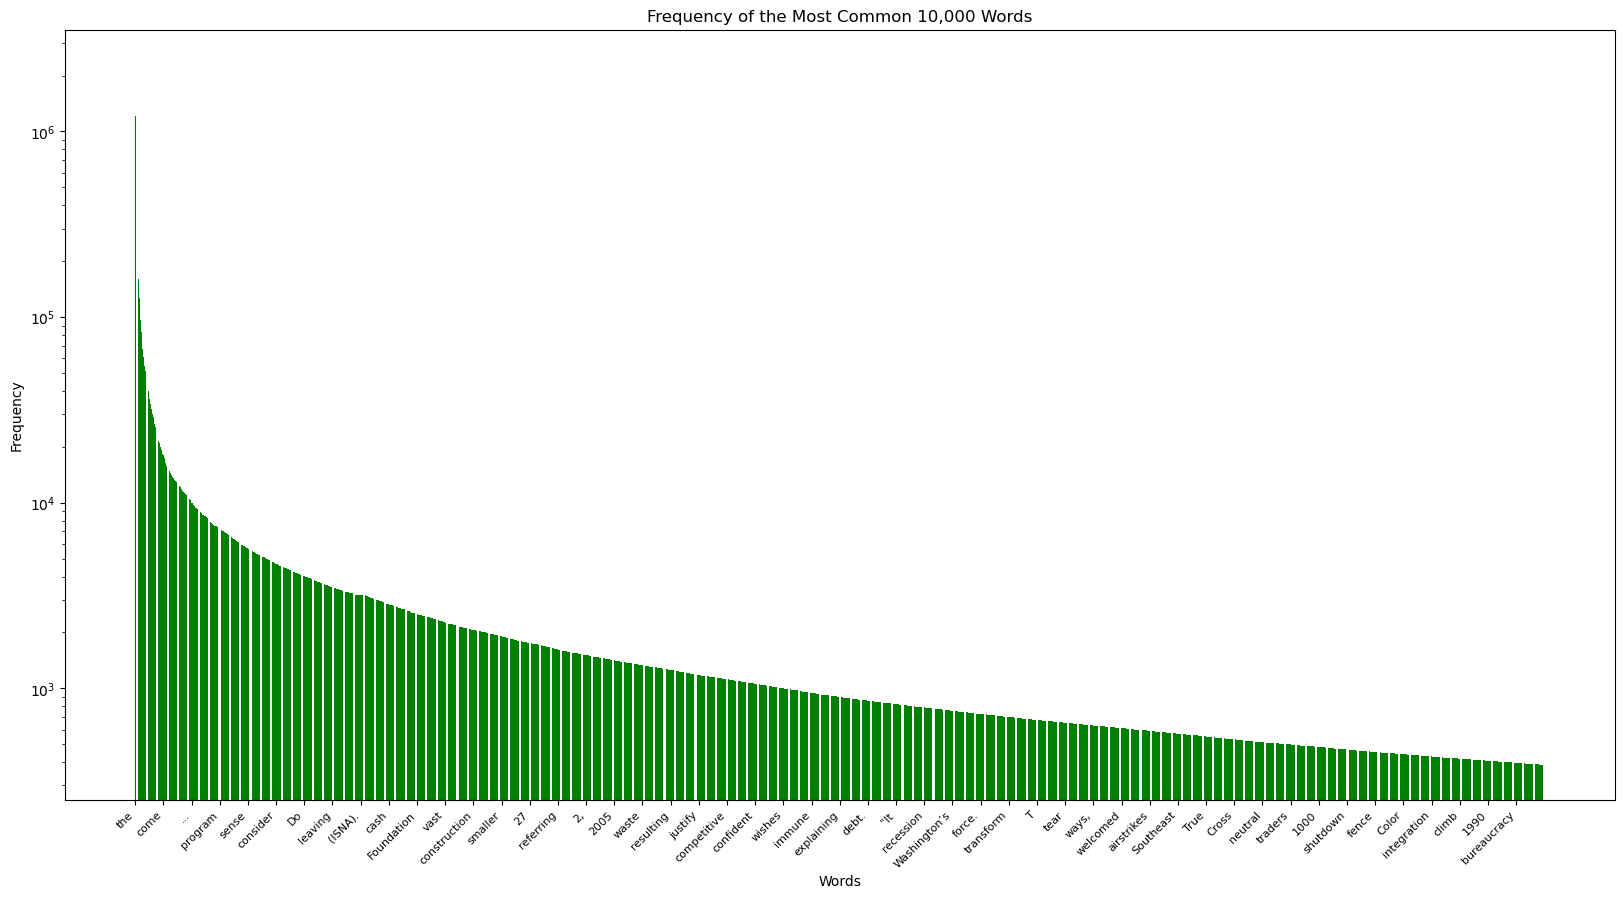

In [22]:
hypiggeste_ord = cleaned_antal_ord.most_common(10000)   # The 10,000 most frequent words
ord = [o for o, t in hypiggeste_ord]                    # Extract words
antal = [t for o, t in hypiggeste_ord]                  # Extract counts

# Plot settings
plt.figure(figsize=(20, 10))  # Make the figure large enough to handle many data points
plt.bar(ord, antal, color='green')  # Plot bars in green as before
plt.xticks(range(0, len(ord), 200), [ord[i] for i in range(0, len(ord), 200)], rotation=45, ha='right', fontsize=8)  # Show only selected x-ticks to avoid overlap
plt.yscale('log')  # Use logarithmic scale to better display the disparity in frequencies
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of the Most Common 10,000 Words')
plt.show()

## Chart description 

This graph displays the frequency of the top 10,000 most common words found in a 10% snippet of the "content" column from the large article-corpus. The words are plotted on the x-axis against their frequency on the y-axis, which uses a logarithmic scale to better visualize the wide range of frequencies, from very common to relatively rare words.

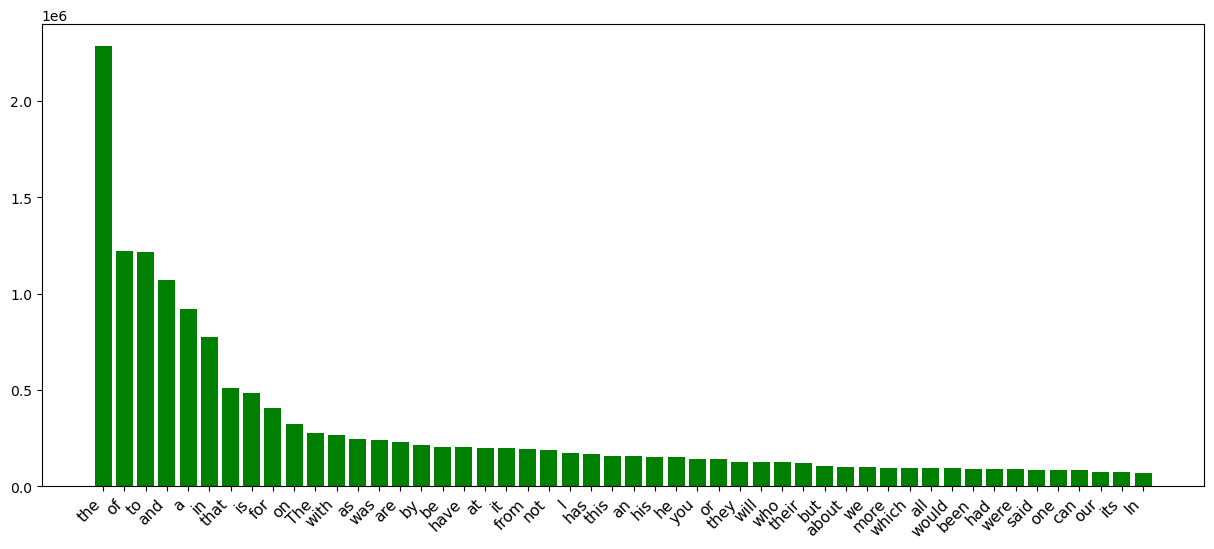

In [9]:
hypiggeste_ord = cleaned_antal_ord.most_common(50)   #De 10000 mest hyppige ord i 'ord_antal', laves til en liste mad tupler, 
                                                        #bestående af ord og ordet's hyppighed

ord = [ord for ord, tælling in hypiggeste_ord]          #Laver en liste med ordene fra 'hypiggeste_ord'. 
                                                        #Her itereres gennem hver tuple og udtrækkes ordet.
antal = [tælling for ord, tælling in hypiggeste_ord]    #Laver en liste med antal forekomster fra 'hypiggeste_ord'. 
                                                        #Her itereres gennem hver tuple og udtrækkes antal forekomster.
#Plottet
plt.figure(figsize=(15, 6))                             #Figurens højde og bredde
plt.bar(ord, antal, color = "GREEN")                  #'ord' og 'antal' sættes på x- og y-aksen i plottet
#plt.xticks(rotation=45, ha='right', fontsize=11)   
plt.xticks(range(0, len(ord), 1), ord[::1], rotation=45, ha='right', fontsize=11)
#Teksten på x-aksen roteres og tekststørrelsen vælges
plt.show()

## chart description 

This graph illustrates the frequency of the top 50 most common words extracted from a 10% sample of the "content" column of the article corpus. The words are plotted on the x-axis, and their frequencies are shown on the y-axis, each represented by green bars. By limiting the display to the top 50 words and rotating the labels on the x-axis for better visibility, this visualization effectively highlights the most prevalent terms within the dataset, offering a focused view on the core vocabulary used across the articles.